# Task
+ Build a neural network which ignore the bias.

+ References:
1. https://mlfromscratch.com/neural-network-tutorial/#/
2. https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create the dataset

## Each letter

In [1]:
A = [[
    0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0, 
    1, 1, 0, 0, 1, 1,
    1, 1, 1, 1, 1, 1,
    1, 1, 0, 0, 1, 1,
    1, 0, 0, 0, 0, 1    
]]

B = [[
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0, 
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 1,
    0, 1, 0, 0, 0, 1,
    0, 1, 1, 1, 1, 1    
]]

C = [[
    0, 1, 1, 1, 1, 1,
    0, 1, 0, 0, 0, 0, 
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 1    
]]

## Define the label of each letter

In [2]:
# True Label of each letter
y = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

## Visualization

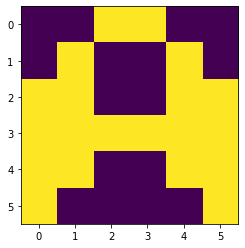

In [5]:
plt.imshow(np.array(A).reshape(6, 6))
plt.show()

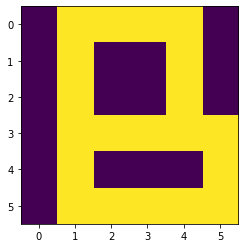

In [6]:
plt.imshow(np.array(B).reshape(6, 6))
plt.show()

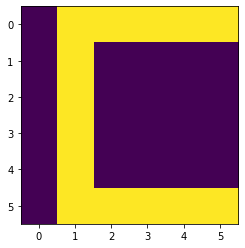

In [7]:
plt.imshow(np.array(C).reshape(6, 6))
plt.show()

## Convert lists to numpy array
將6*6的圖片轉換成能丟進Neural Network的格式

In [8]:
np.array(C).shape

(1, 36)

In [9]:
# 將每一張圖片拉直，有顏色為1，沒顏色為0。
# 並將三張圖片Concat在一起，丟入NN。
x = [np.array(A), np.array(B), np.array(C)]

y = np.array(y)

print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]]), array([[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


# Design artitecture of Neural Network

1. Input Layer
2. Hidden Layer
    + Activation Function
3. Output Layer

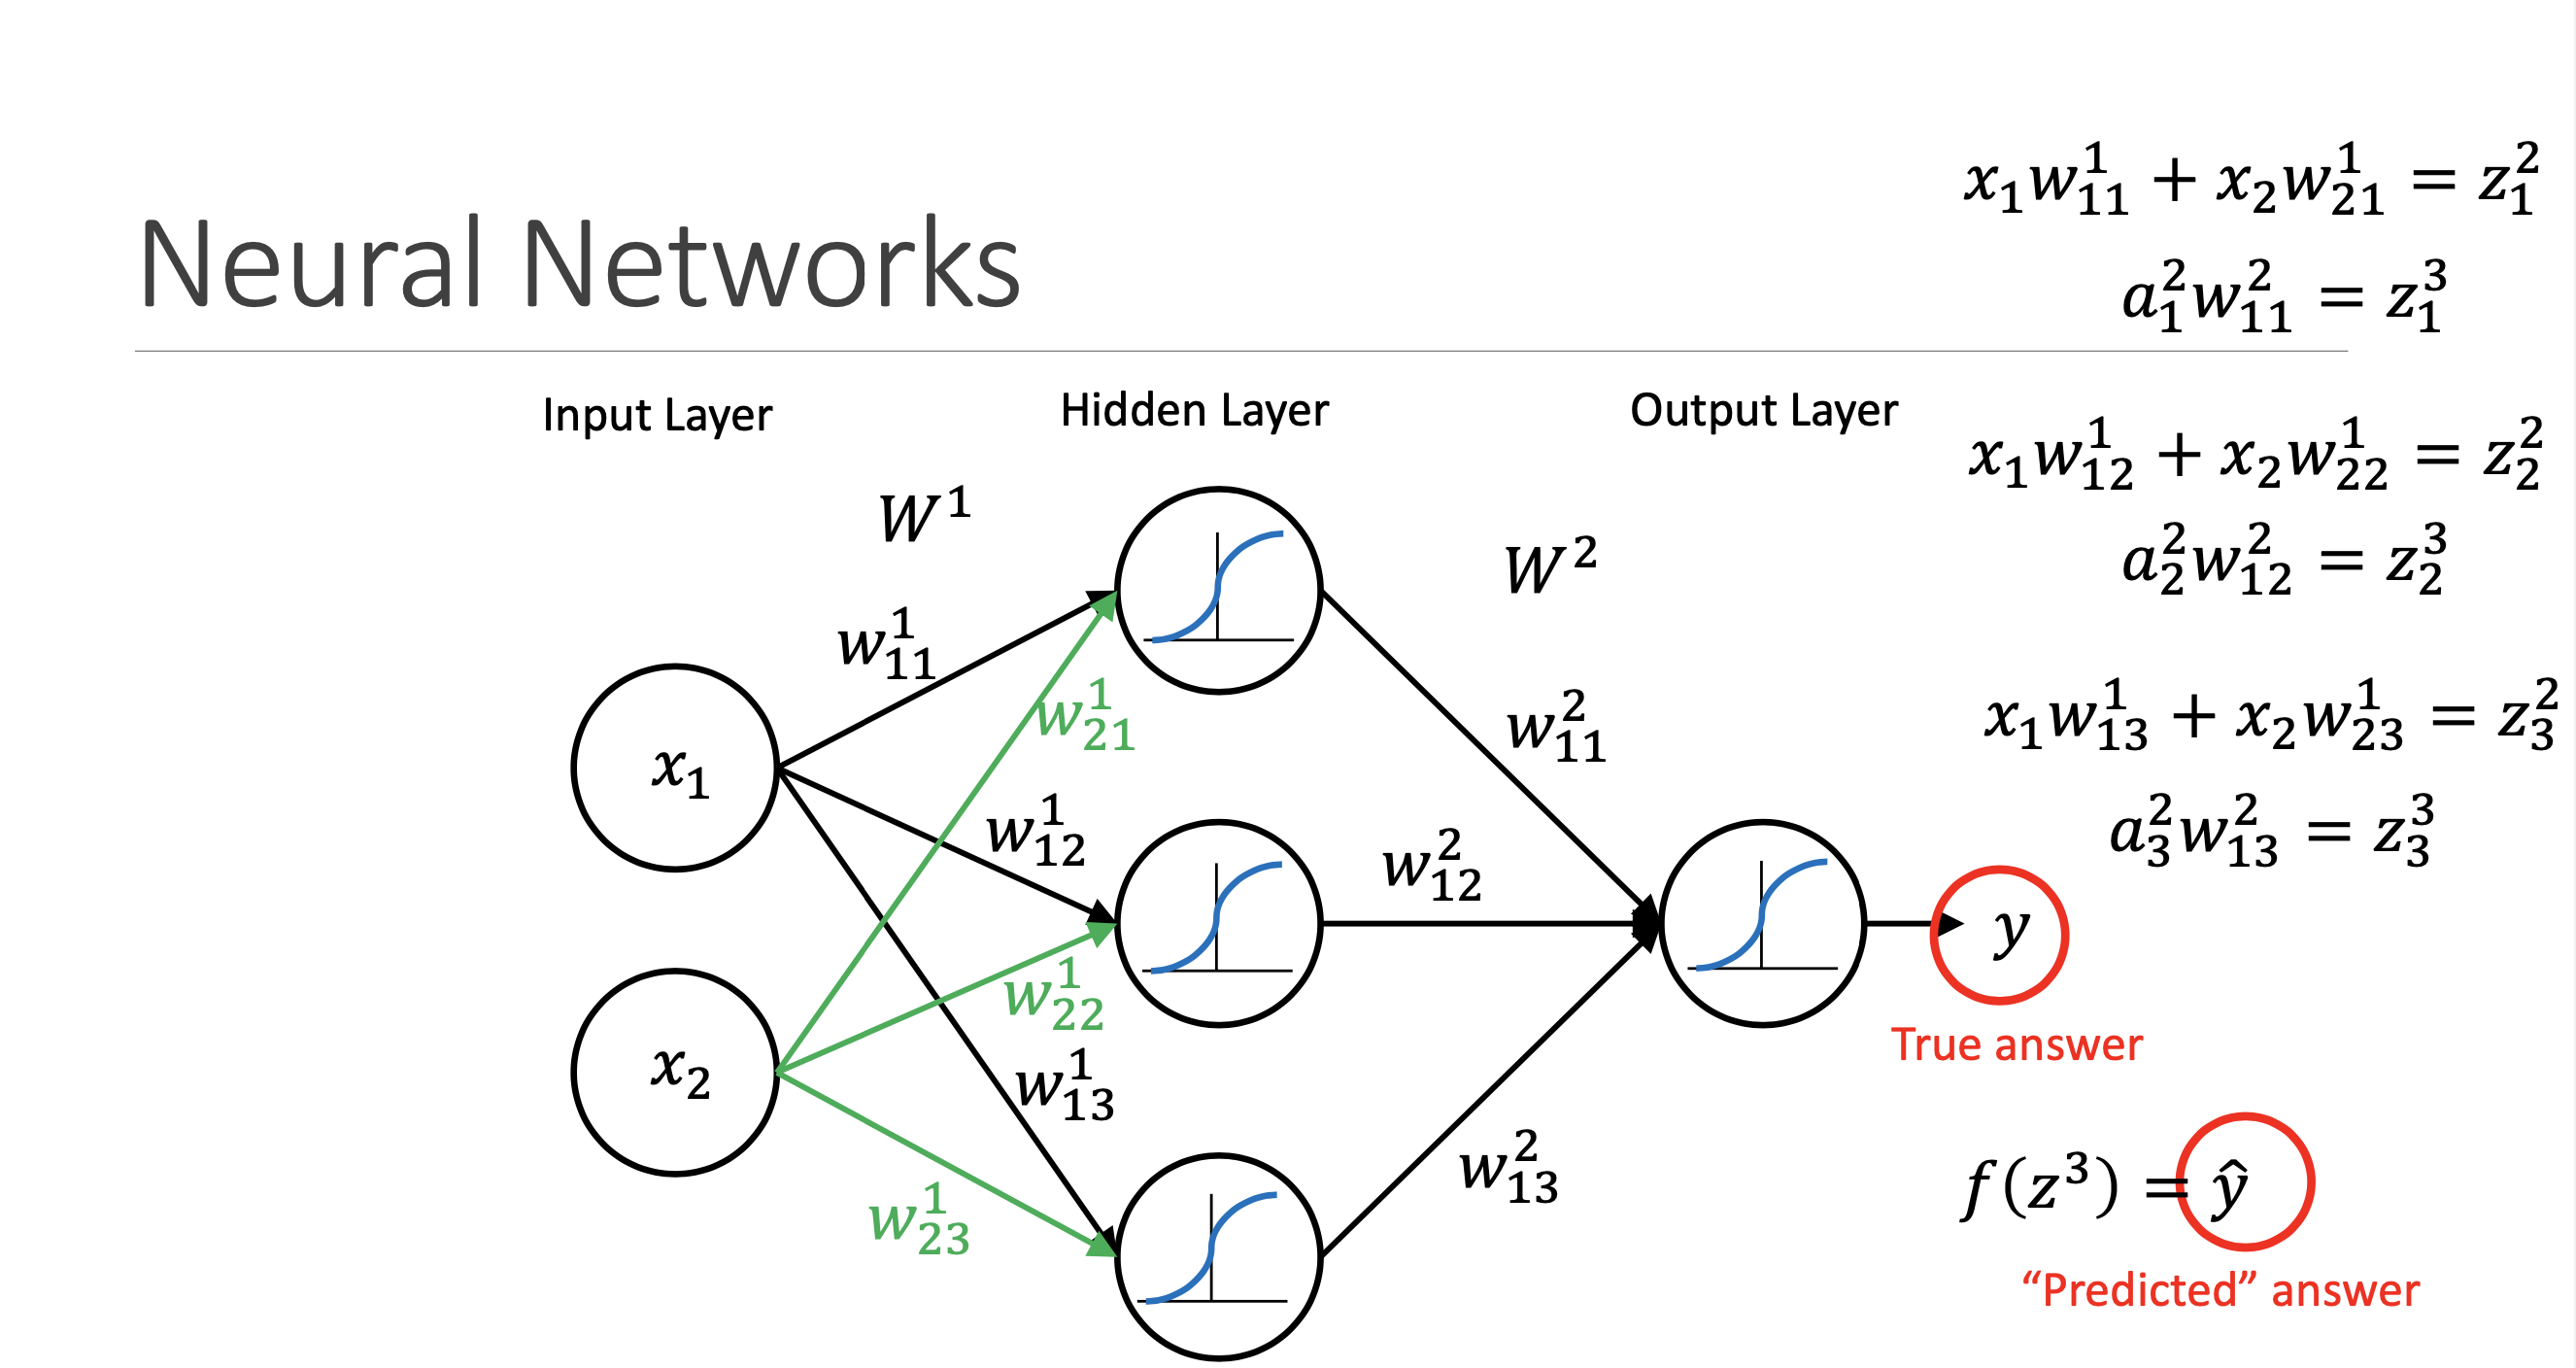

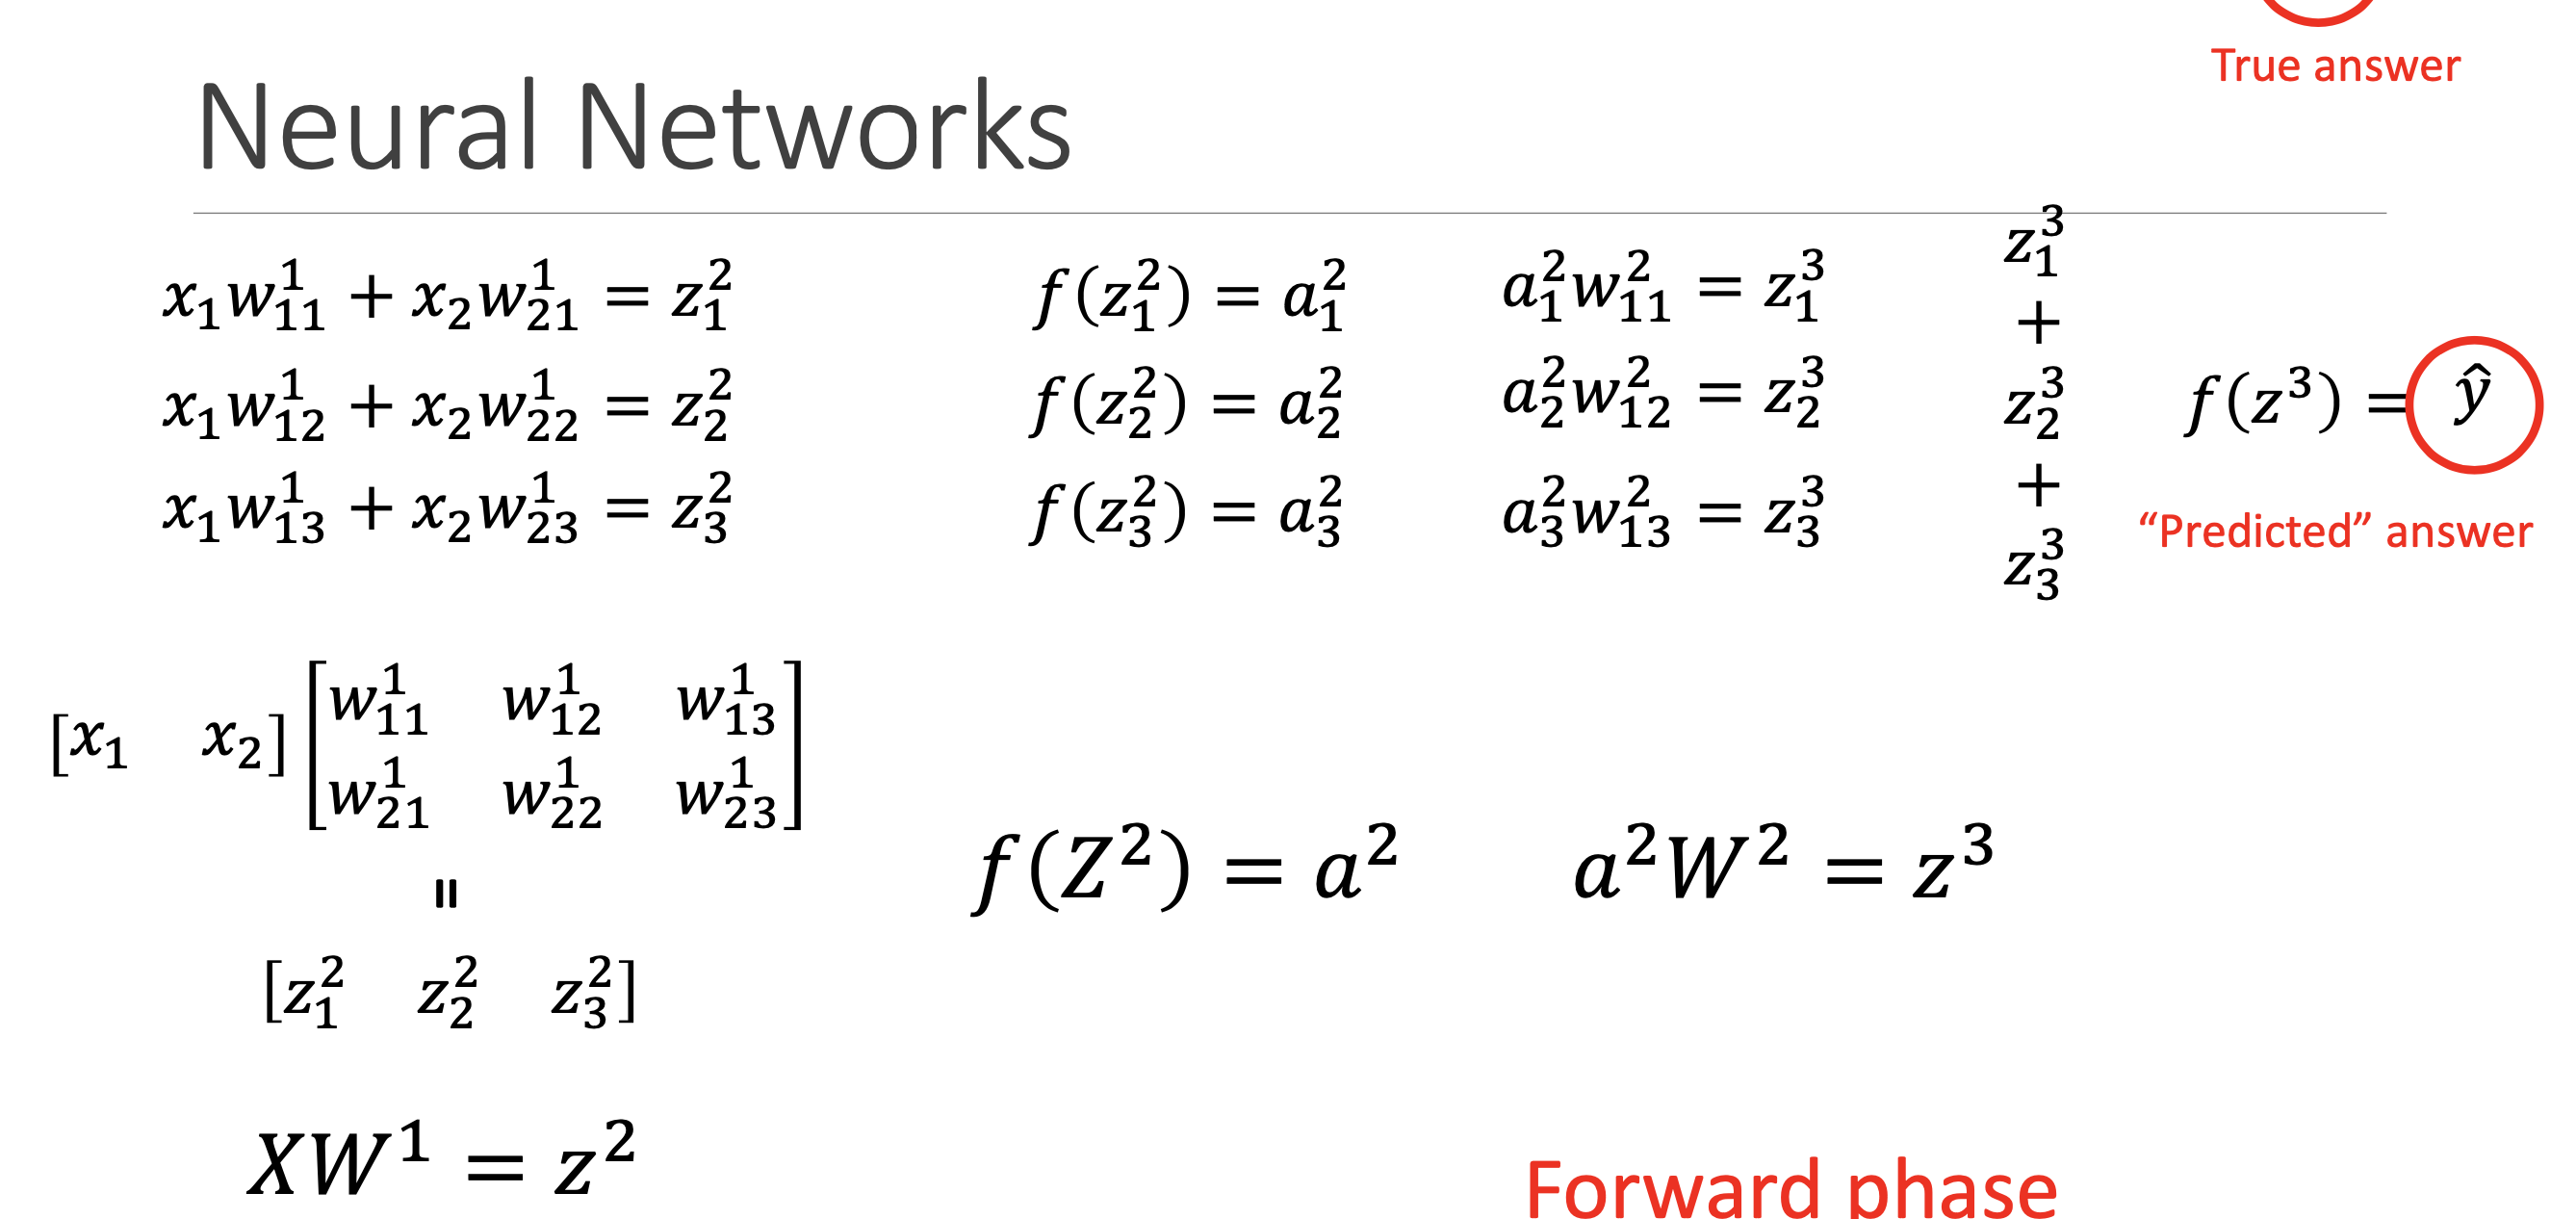

## My Neural Network
+ Input : (3, 36)
+ 1st Layer : Input Layer size (1, 36)
+ 2nd Layer : Hidden Layer size (1, 10)
+ 3rd Layer : Output Layer size (1, 3)
+ Output : (3, 3) 

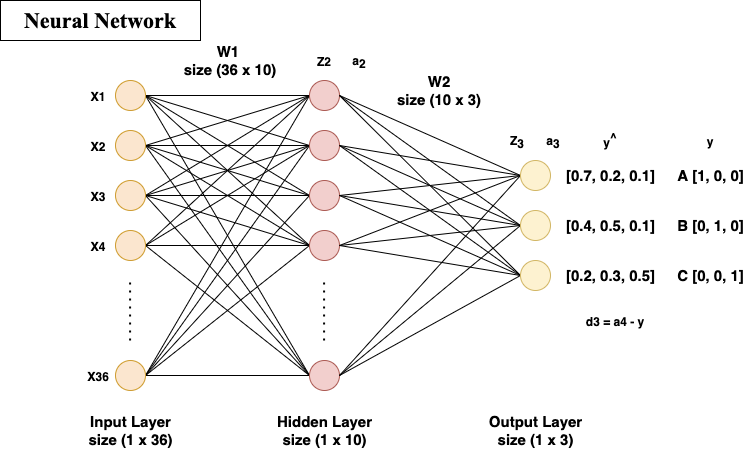

## Activation Function

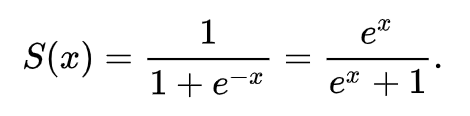

In [10]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

## Feed Forward Phase

In [11]:
# 設計矩陣相乘
def f_forward(x, w1, w2):
    # Hidden Layer
    z2 = np.dot(x, w1)
    a2 = sigmoid(z2)
    
    # Output Layer
    z3 = np.dot(a2, w2)
    a3 = sigmoid(z3)
    
    return a3


## Initialization of weights

In [12]:
# 初始隨機產生權重矩陣
def generate_wt(x, y):
    matrix = []
    for i in range(x * y):
        matrix.append(np.random.randn()) # randn函數返回一個或一組樣本，具有標準常態分佈。
    return (np.array(matrix).reshape(x, y))

## Loss Function

In [18]:
# 決定每次更新權重的比較標準
# now use Cross Entropy
def loss(output, y):
    # out, Y : matrix
    return - np.mean(
        np.multiply(y, np.log(output)) + np.multiply((1-y), np.log(1-output)))

## Back Forward Phase

In [14]:
# 更新權重 Back_Propagation
def back_prop(x, y, w1, w2, alpha):
    # Hidden Layer
    z2 = np.dot(x, w1)
    a2 = sigmoid(z2)
        
    # Output Layer
    z3 = np.dot(a2, w2)
    a3 = sigmoid(z3)
    
    # find derivative of the loss function with respect to w2 and w1
    d2 = np.dot(a2.T, ((2/len(y))*(a3 - y)) * ((1 - a3)*a3)) # derivative of activation function multiply the derivative of loss function 
    d1 = np.dot(x.T, np.dot(((2/len(y))*(a3 - y)) * ((1 - a3)*a3), w2.T) * ((1 - a2)*a2))
    
    # update the gradients
    w1 = w1 - (alpha * d1)
    w2 = w2 - (alpha * d2)
    
    return (w1, w2)

## Train / Predict

In [15]:
def train(x, y, w1, w2, alpha = 0.01, epoch = 10):
    acc = []
    losses = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            output = f_forward(x[i], w1, w2)
            l.append(loss(output, y[i]))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)   
        acc.append((1-(sum(l)/len(x)))*100)
        losses.append(sum(l)/len(x))
    return (acc, losses, w1, w2)

def predict(x, w1, w2):
    output = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(output[0])):
        if(maxm < output[0][i]):
            maxm = output[0][i]
            k = i
    if (k == 0):
        print("Image is of letter A.")
    elif (k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    
    plt.imshow(x.reshape(6, 6))
    plt.show()

# Start to use the model

## Generate weights

In [16]:
w1 = generate_wt(36, 10)
w2 = generate_wt(10, 3)
print(w1, "\n\n", w2)

[[-5.23866518e-01 -1.41880921e+00  8.15598295e-01  1.49694337e+00
  -1.20509987e-01 -5.59688407e-01  3.68607345e-01  2.07431403e-02
  -5.52953239e-03 -1.95048000e+00]
 [-1.42384031e+00  2.06534058e-01  8.75155450e-01 -9.10508553e-01
   4.31719500e-01 -2.98266065e-01  1.03790592e+00  1.67819881e+00
   6.12969834e-02 -5.47915023e-02]
 [-1.77976040e-01  5.85850729e-01 -1.31953379e+00  5.61216438e-01
  -4.65864183e-01  2.05053526e+00 -2.25376091e+00 -5.07339902e-01
   1.20456148e+00  1.38606935e+00]
 [-4.92912083e-01 -8.97212930e-01 -1.27067890e+00 -6.99956293e-01
   3.96839276e-01  4.27006548e-01 -4.24618373e-01 -1.74164101e+00
   9.98146527e-02  2.42250508e+00]
 [-9.36217606e-01  1.13603821e+00 -2.01464907e-01 -3.22450135e-01
  -1.03132769e+00  3.68260793e-02  7.45317936e-01  6.90057814e-01
   6.99404777e-01  4.50242644e-01]
 [-2.97422304e-01  5.26733829e-01  2.23828303e-01 -1.32491278e+00
  -7.39160412e-01 -2.20912851e+00  6.96192619e-01 -1.43332109e+00
  -1.26554077e+00 -8.20367741e-01

## Train the model

In [19]:
acc, losses, w1, w2 = train(x, y, w1, w2, 0.1, 500)

epochs: 1 ======== acc: 21.98057517095021
epochs: 2 ======== acc: 22.694279628124946
epochs: 3 ======== acc: 23.39943990911951
epochs: 4 ======== acc: 24.095321262834858
epochs: 5 ======== acc: 24.781200019151793
epochs: 6 ======== acc: 25.456368216664938
epochs: 7 ======== acc: 26.120138305036445
epochs: 8 ======== acc: 26.771847758919165
epochs: 9 ======== acc: 27.41086339184361
epochs: 10 ======== acc: 28.036585124598467
epochs: 11 ======== acc: 28.648448955844763
epochs: 12 ======== acc: 29.24592891445649
epochs: 13 ======== acc: 29.82853785124536
epochs: 14 ======== acc: 30.39582705381464
epochs: 15 ======== acc: 30.947384835255797
epochs: 16 ======== acc: 31.482834438527142
epochs: 17 ======== acc: 32.0018317876923
epochs: 18 ======== acc: 32.50406377177
epochs: 19 ======== acc: 32.98924783080071
epochs: 20 ======== acc: 33.45713359355228
epochs: 21 ======== acc: 33.90750716833123
epochs: 22 ======== acc: 34.340198405867106
epochs: 23 ======== acc: 34.75509105299781
epochs: 24 ==

epochs: 262 ======== acc: 76.40200271599286
epochs: 263 ======== acc: 76.46845223345939
epochs: 264 ======== acc: 76.53437118076131
epochs: 265 ======== acc: 76.59976790582836
epochs: 266 ======== acc: 76.66465054597688
epochs: 267 ======== acc: 76.72902703484938
epochs: 268 ======== acc: 76.79290510909142
epochs: 269 ======== acc: 76.85629231477644
epochs: 270 ======== acc: 76.9191960135891
epochs: 271 ======== acc: 76.98162338877658
epochs: 272 ======== acc: 77.04358145087775
epochs: 273 ======== acc: 77.1050770432386
epochs: 274 ======== acc: 77.16611684732332
epochs: 275 ======== acc: 77.22670738782867
epochs: 276 ======== acc: 77.28685503760991
epochs: 277 ======== acc: 77.34656602242575
epochs: 278 ======== acc: 77.40584642550968
epochs: 279 ======== acc: 77.46470219197448
epochs: 280 ======== acc: 77.52313913305679
epochs: 281 ======== acc: 77.58116293020785
epochs: 282 ======== acc: 77.63877913903684
epochs: 283 ======== acc: 77.69599319311241
epochs: 284 ======== acc: 77.75281

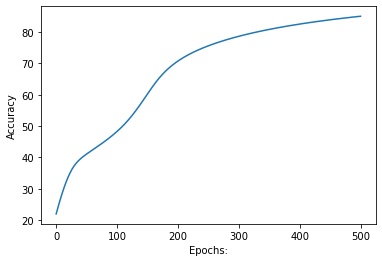

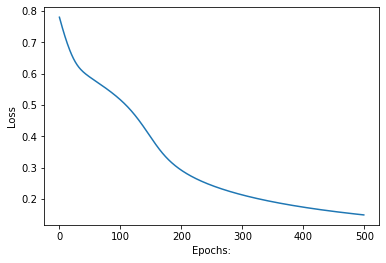

In [20]:
import matplotlib.pyplot as plt1
  
# ploting accuraccy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
  
# plotting Loss
plt1.plot(losses)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [21]:
print(w1, "\n", w2)

[[-5.23866518e-01 -1.41880921e+00  8.15598295e-01  1.49694337e+00
  -1.20509987e-01 -5.59688407e-01  3.68607345e-01  2.07431403e-02
  -5.52953239e-03 -1.95048000e+00]
 [-1.88877880e+00  1.75943252e-01  8.39326718e-01 -9.45443771e-01
   4.95413013e-01 -7.62607254e-01  9.10147307e-01  1.84475579e+00
   2.55863456e-02 -2.19750460e-02]
 [-5.40202542e-01  5.66410046e-01 -1.41432721e+00  5.24933085e-01
  -4.02710332e-01  2.16996688e+00 -2.26865919e+00 -5.24187018e-01
   1.16892746e+00  1.30785007e+00]
 [-8.55138585e-01 -9.16653614e-01 -1.36547231e+00 -7.36239645e-01
   4.59993128e-01  5.46438160e-01 -4.39516650e-01 -1.75848812e+00
   6.41806372e-02  2.34428581e+00]
 [-1.40115609e+00  1.10544740e+00 -2.37293639e-01 -3.57385353e-01
  -9.67634179e-01 -4.27515110e-01  6.17559321e-01  8.56614796e-01
   6.63694140e-01  4.83059101e-01]
 [-8.96110483e-01  4.95795435e-01  2.25171385e-01 -1.36055354e+00
  -6.59169049e-01 -2.19759753e+00  1.11597037e+00 -1.27939662e+00
  -1.30128022e+00 -7.86068521e-01

## Predict the letter

In [22]:
A1 = [[
    0, 0, 1, 1, 0, 0,
    0, 0, 1, 1, 0, 0, 
    1, 1, 0, 0, 1, 1,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1    
]]

B1 = [[
    0, 0, 1, 1, 1, 0,
    0, 0, 1, 0, 1, 0, 
    0, 0, 1, 0, 1, 0,
    0, 0, 1, 1, 1, 1,
    0, 0, 1, 0, 0, 1,
    0, 0, 1, 1, 1, 1    
]]

C1 = [[
    0, 0, 0, 0, 1, 1,
    0, 1, 1, 1, 1, 0, 
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 1    
]]

y_test = [
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
]

In [23]:
x_test = [np.array(B1), np.array(A1), np.array(C1)]

y_test = np.array(y_test)

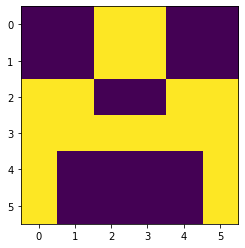

In [24]:
plt.imshow(np.array(A1).reshape(6, 6))
plt.show()

Image is of letter A.


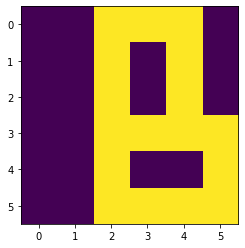

In [25]:
predict(x_test[0], w1, w2)

# Class

In [110]:
# x, y, w1, w2, alpha = 0.01, epoch = 10
class DeepNeuralNetwork:
    
    def __init__(self, sizes, epochs, l_rate):
        self.sizes = sizes
        self.epochs = epochs
        self.l_rate = l_rate    
        
        self.w1 = self.initialization(self.sizes[0][0], self.sizes[0][1])
        self.w2 = self.initialization(self.sizes[1][0], self.sizes[1][1])
    
    # Activation Function
    def sigmoid(self, x):
        return (1/(1 + np.exp(-x)))
    
    # Feed Forward Phase
    def f_forward(self, x, w1, w2):
        # Hidden Layer
        a2 = sigmoid(np.dot(x, w1))

        # Output Layer
        a3 = sigmoid(np.dot(a2, w2))

        return a3
    
    # Generate initial weights
    def initialization(self, x, y):
        matrix = []
        for i in range(x * y):
            matrix.append(np.random.randn()) # randn函數返回一個或一組樣本，具有標準常態分佈。
        return (np.array(matrix).reshape(x, y))
    
    # Loss Function
    # now use Cross Entropy
    def loss(self, output, y):
        # out, Y : matrix
        return - np.mean(
            np.multiply(y, np.log(output)) + np.multiply((1-y), np.log(1-output)))
    
    # Back Propagation
    def back_prop(self, x, y, w1, w2, alpha):
        # Hidden Layer
        a2 = sigmoid(np.dot(x, w1))

        # Output Layer
        a3 = sigmoid(np.dot(a2, w2))

        # find derivative of the loss function with respect to w2 and w1
        # following code may not be easy to understand
        d2 = np.dot(a2.T, ((2/len(y))*(a3 - y)) * ((1 - a3)*a3)) # derivative of activation function multiply the derivative of loss function 
        d1 = np.dot(x.T, np.dot(((2/len(y))*(a3 - y)) * ((1 - a3)*a3), w2.T) * ((1 - a2)*a2))

        # update the gradients
        w1 = w1 - (alpha * d1)
        w2 = w2 - (alpha * d2)

        return (w1, w2)
    
    # Train
    def train(self, x, y, w1, w2, l_rate, epochs):
        acc = []
        losses = []
        for j in range(epochs):
            l = []
            for i in range(len(x)):
                output = f_forward(x[i], w1, w2)
                l.append(loss(output, y[i]))
                w1, w2 = back_prop(x[i], y[i], w1, w2, l_rate)
            print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)   
            acc.append((1-(sum(l)/len(x)))*100)
            losses.append(sum(l)/len(x))
        return (acc, losses, w1, w2)

    # Predict single picture
    def predict(self, x, w1, w2):
        output = f_forward(x, w1, w2)
        maxm = 0
        k = 0
        for i in range(len(output[0])):
            if(maxm < output[0][i]):
                maxm = output[0][i]
                k = i
        if (k == 0):
            print("Image is of letter A.")
        elif (k == 1):
            print("Image is of letter B.")
        else:
            print("Image is of letter C.")

        plt.imshow(x.reshape(6, 6))
        plt.show()
    
    def run(self, x, y):
        
        acc, losses, w1, w2 = train(x, y, self.w1, self.w2, self.l_rate, self.epochs)
        
        return acc, losses, w1, w2
     

In [111]:
sizes = [[36,10], [10,3]]

In [112]:
DNN = DeepNeuralNetwork(sizes, 100, 0.1)
acc, losses, w1, w2 = DNN.run(x, y)

epochs: 1 ======== acc: 1.4594525882544729
epochs: 2 ======== acc: 3.1137860710823695
epochs: 3 ======== acc: 4.771391171269423
epochs: 4 ======== acc: 6.430642628054617
epochs: 5 ======== acc: 8.089478145190865
epochs: 6 ======== acc: 9.745476233556493
epochs: 7 ======== acc: 11.39592753061679
epochs: 8 ======== acc: 13.037891798743962
epochs: 9 ======== acc: 14.668238520203436
epochs: 10 ======== acc: 16.283674095247992
epochs: 11 ======== acc: 17.880761698426063
epochs: 12 ======== acc: 19.45594034865087
epochs: 13 ======== acc: 21.00554822907782
epochs: 14 ======== acc: 22.52585294035945
epochs: 15 ======== acc: 24.013089395823872
epochs: 16 ======== acc: 25.46350516596275
epochs: 17 ======== acc: 26.87341323173872
epochs: 18 ======== acc: 28.239252727229225
epochs: 19 ======== acc: 29.557658557466926
epochs: 20 ======== acc: 30.82554016132014
epochs: 21 ======== acc: 32.04016797320093
epochs: 22 ======== acc: 33.199263628729405
epochs: 23 ======== acc: 34.30108733780326
epochs: 24

Image is of letter B.


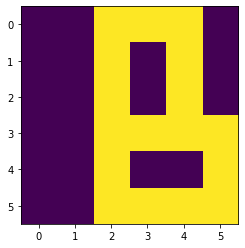

In [113]:
DNN.predict(x_test[0], w1, w2)